In [101]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("BlackFriday.csv")

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.shape

(537577, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [11]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [12]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [16]:
df["User_ID"].nunique()

5891

In [17]:
df["Product_ID"].nunique()

3623

In [29]:
df.groupby(by="Age").sum()["Marital_Status"]

C:\Users\HP\AppData\Local\Temp\ipykernel_16968\3621652262.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by="Age").sum()["Marital_Status"]


Age
0-17         0
18-25    20641
26-35    84166
36-45    42507
46-50    32194
51-55    26979
55+      13273
Name: Marital_Status, dtype: int64

In [32]:
for column in df.columns:
    print(column,df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


In [54]:
data=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]),len(df[df["Gender"]=="F"])]},index=["Male","Female"])

In [55]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

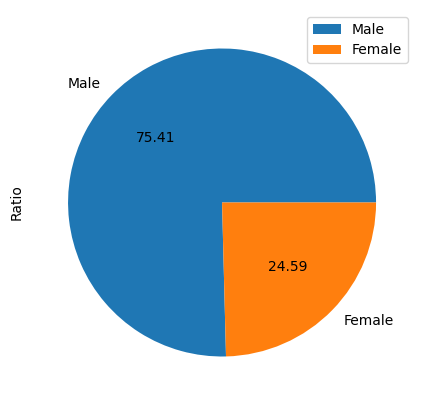

In [66]:
data.plot.pie(y="Ratio",figsize=(5,5),autopct="%.2f")

<Axes: >

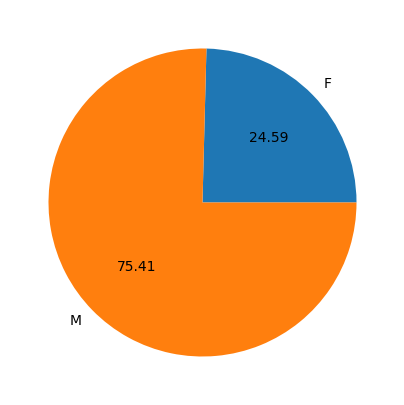

In [76]:
df.groupby("Gender").size().plot.pie(y="Ratio",figsize=(5,5),autopct="%.2f")


C:\Users\HP\AppData\Local\Temp\ipykernel_16968\567453544.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").sum()['Purchase'].plot.pie(autopct="%.2f")


<Axes: ylabel='Purchase'>

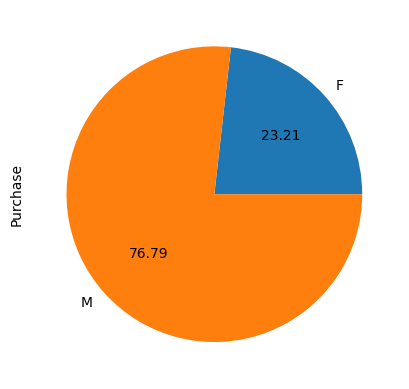

In [79]:
df.groupby("Gender").sum()['Purchase'].plot.pie(autopct="%.2f")

C:\Users\HP\AppData\Local\Temp\ipykernel_16968\437493317.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").mean()['Purchase'].plot.pie(autopct="%.2f")


<Axes: ylabel='Purchase'>

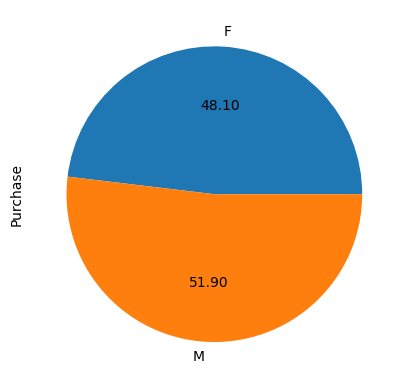

In [82]:
df.groupby("Gender").mean()['Purchase'].plot.pie(autopct="%.2f")

<Axes: title={'center': 'Purchase distribution w.r.t Age'}, xlabel='Age'>

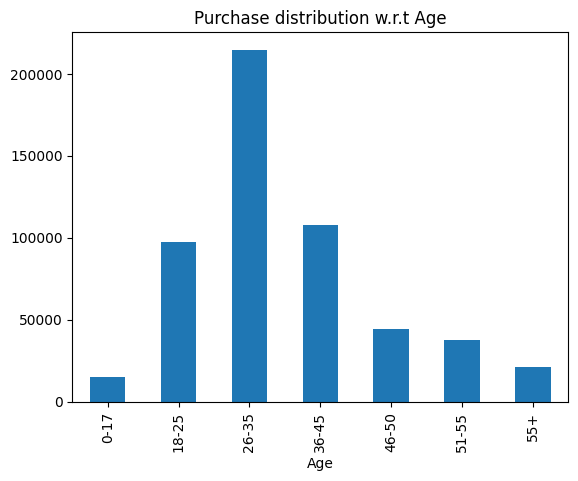

In [88]:
df.groupby("Age").size().plot.bar(title="Purchase distribution w.r.t Age")

<Axes: xlabel='Age'>

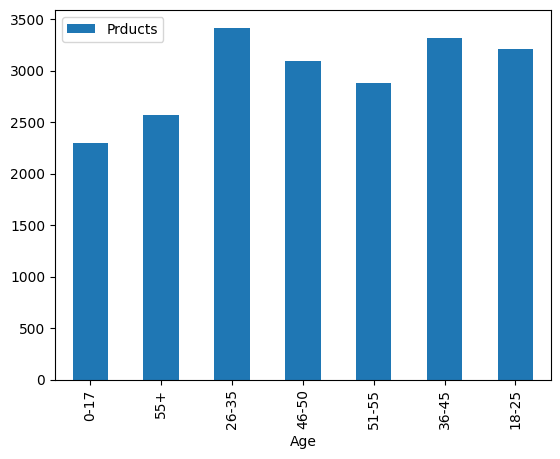

In [100]:
lst=[]
for i in df["Age"].unique():
    lst.append([i,df[df["Age"]==i]["Product_ID"].nunique()])
data=pd.DataFrame(lst,columns=["Age","Prducts"])
data.plot.bar(x="Age")

<Axes: xlabel='Age', ylabel='count'>

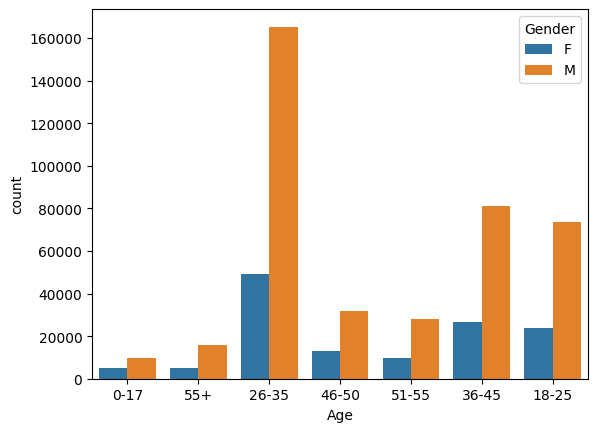

In [103]:
sns.countplot(x="Age",hue="Gender",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

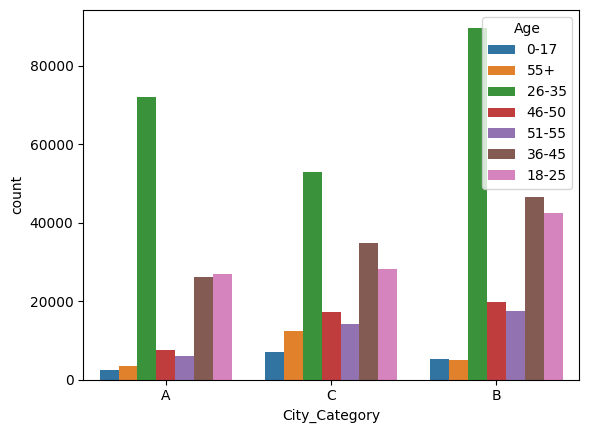

In [105]:
sns.countplot(x="City_Category",hue="Age",data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

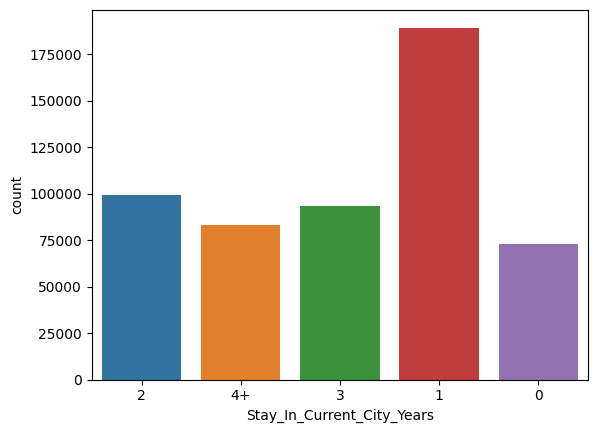

In [106]:
sns.countplot(x=df["Stay_In_Current_City_Years"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

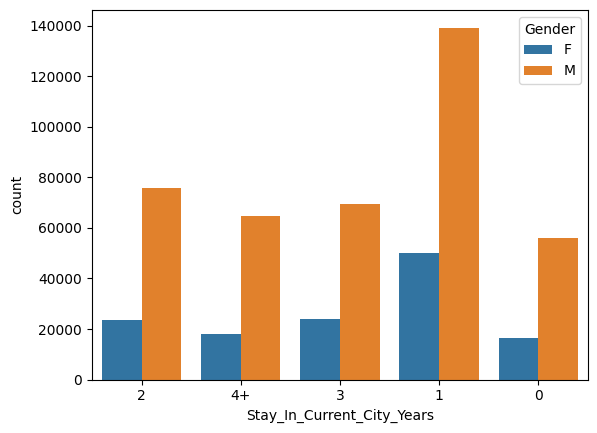

In [108]:
sns.countplot(x=df["Stay_In_Current_City_Years"],hue=df["Gender"])

<Axes: xlabel='Occupation', ylabel='count'>

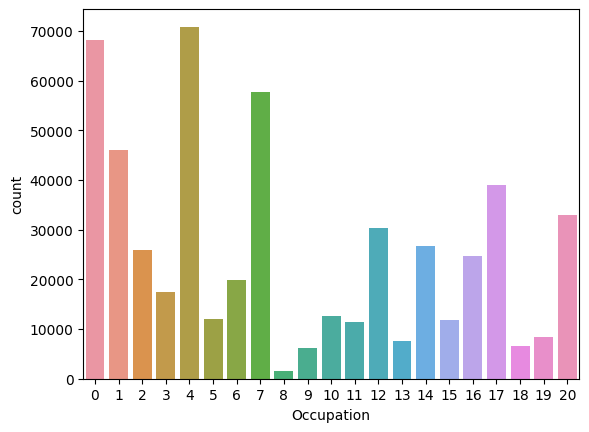

In [109]:
sns.countplot(x=df["Occupation"])

<Axes: xlabel='Occupation'>

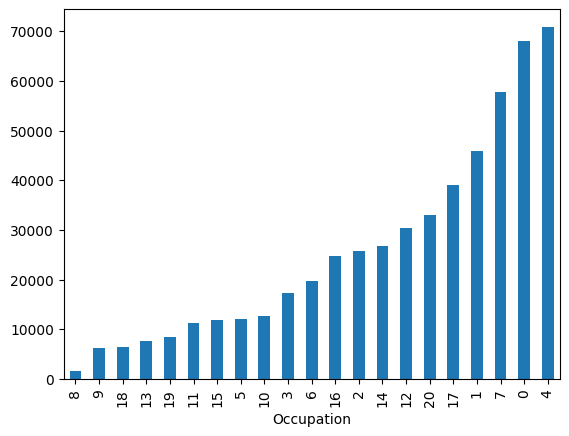

In [113]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

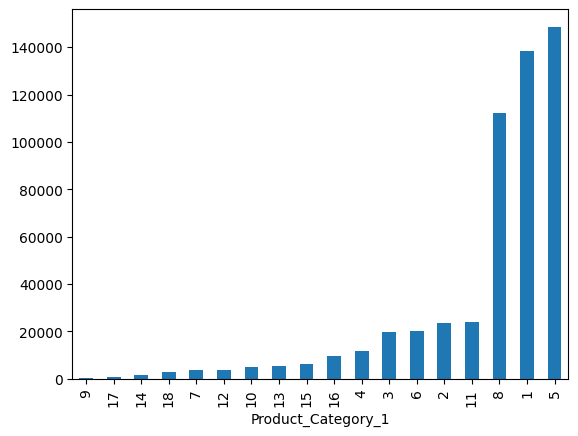

In [116]:
df.groupby("Product_Category_1").size().sort_values().plot(kind="bar")

C:\Users\HP\AppData\Local\Temp\ipykernel_16968\194978392.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product_Category_1").mean()["Purchase"].sort_values().plot(kind="bar")


<Axes: xlabel='Product_Category_1'>

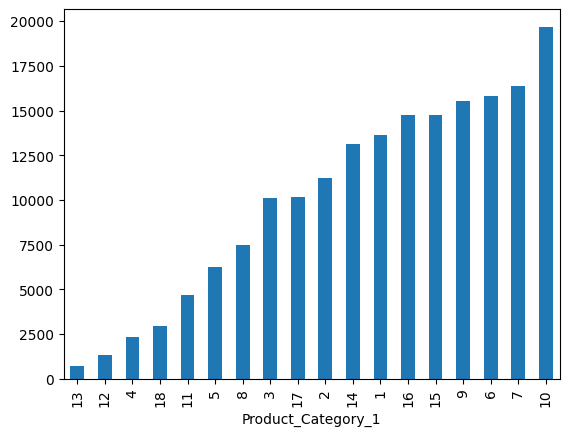

In [118]:
df.groupby("Product_Category_1").mean()["Purchase"].sort_values().plot(kind="bar")

C:\Users\HP\AppData\Local\Temp\ipykernel_16968\251530152.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Product_ID").sum()["Purchase"].sort_values().nlargest(10).plot(kind="bar")


<Axes: xlabel='Product_ID'>

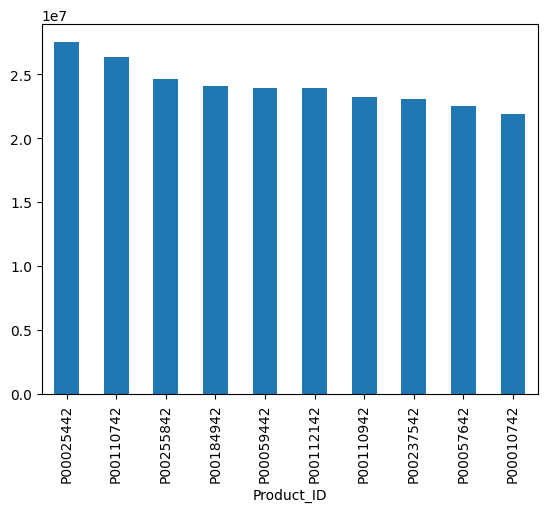

In [123]:
df.groupby("Product_ID").sum()["Purchase"].sort_values().nlargest(10).plot(kind="bar")